<h2>Data Mining End of Semester 2 Year 1 August 2022</h2><br><b>BY EDISON NKURUNUNGI</b><br><b>JAN22/COMP/959U</b>

<b>QUESTION 3</b>

<b>Import Libraries to be used</b>

In [57]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [58]:
# for test-train split and r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [59]:
# for linear regression:
from sklearn.linear_model import LinearRegression

In [60]:
# for cross validation and prediction
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [61]:
# for mean square error
from sklearn.metrics import mean_squared_error

In [62]:
# for saving trained models to disk:
import pickle

In [63]:
africa_url = 'https://www.worldometers.info/population/countries-in-africa-by-population/' #assign the wiki page

page = requests.get(africa_url) # create a handle to for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

In [64]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:#
2:Country (or dependency)
3:Population (2020)
4:Yearly Change
5:Net Change
6:Density (P/Km²)
7:Land Area (Km²)
8:Migrants (net)
9:Fert. Rate
10:Med. Age
11:Urban Pop %
12:World Share


In [65]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=12: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

In [66]:
[len(C) for (title,C) in col]

[58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58]

In [67]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [68]:
df.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,Nigeria,"206,139,589",2.58 %,"5,175,990",226,"910,770","-60,000",5.4,18,52 %,2.64 %
1,2,Ethiopia,"114,963,588",2.57 %,"2,884,858",115,"1,000,000","30,000",4.3,19,21 %,1.47 %
2,3,Egypt,"102,334,404",1.94 %,"1,946,331",103,"995,450","-38,033",3.3,25,43 %,1.31 %
3,4,DR Congo,"89,561,403",3.19 %,"2,770,836",40,"2,267,050","23,861",6.0,17,46 %,1.15 %
4,5,South Africa,"59,308,690",1.28 %,"750,420",49,"1,213,090","145,405",2.4,28,67 %,0.76 %


In [69]:
# Convert multiple columns
df = df.astype({'Population (2020)':'float','Net Change':'float','Fert. Rate':'float','Med. Age':'float'})
print(df.dtypes)

ValueError: could not convert string to float: '206,139,589'

<b>a) Calculating Pearson Correlation</b><br><p>(i) Population and Netchange. (3 marks)</p>


In [70]:
from scipy.stats import pearsonr

In [71]:
# Convert dataframe into series
list1 = df['Population (2020)']
list2 = df['Net Change']

In [72]:
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

TypeError: unsupported operand type(s) for +: 'float' and 'lxml.etree._ElementUnicodeResult'

<p>(ii) FertRate and MedAge. (3 marks)</p>

In [73]:
# Convert dataframe into series
list3 = df['Fert. Rate']
list4 = df['Med. Age']

In [74]:
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

TypeError: unsupported operand type(s) for +: 'float' and 'lxml.etree._ElementUnicodeResult'

<b>b) Produce models relating features in (a) in the forms of Y=mx+c. Where Y is dependent variable, x is independent variable, m is the slope and c is the intercept value. (6 marks)</b>

In [75]:
df.dtypes

#                          object
Country (or dependency)    object
Population (2020)          object
Yearly Change              object
Net Change                 object
Density (P/Km²)            object
Land Area (Km²)            object
Migrants (net)             object
Fert. Rate                 object
Med. Age                   object
Urban Pop %                object
World Share                object
dtype: object

<b>Understanding the Linear relationship between two variables (Population and Netchange)</b>

<p>Let's find the scatterplot of "Population (2020)" and "Net Change"</p>

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

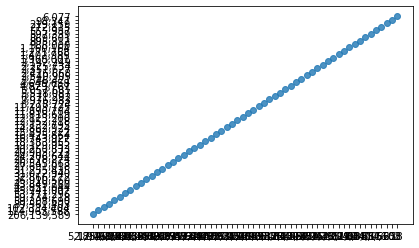

In [76]:
sns.regplot(x = 'Net Change', y = 'Population (2020)', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Population and Netchange")
plt.show()

<p>There is a positive linear correlation between cumulative cases and cumulative deaths</p>

In [77]:
df[["Net Change", "Population (2020)"]].corr()

""


<p>Let's find the scatterplot of "Fert. Rate" and "Med. Age"</p>

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float64')) -> None

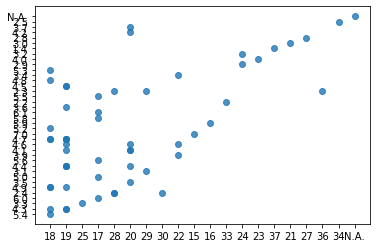

In [78]:
sns.regplot(x = 'Med. Age', y = 'Fert. Rate', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Med. Age and Fert. Rate")
plt.show()

<p>There is a positive linear correlation between cumulative cases and cumulative deaths</p>

<b>Let us perform simple linear regression by writing our simple linear models</b>

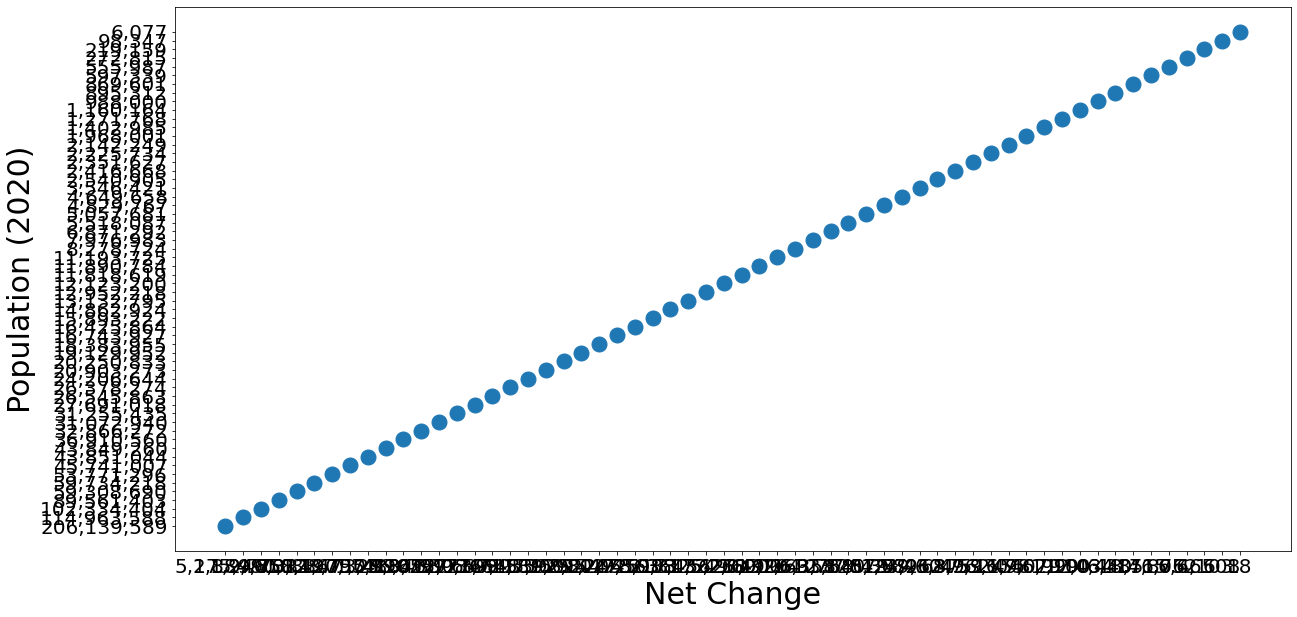

In [79]:
# dependent variable on y axis
y = df['Population (2020)']

# independent variable on x axis
x = df['Net Change']


#Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Population (2020)', fontsize = 30)
plt.xlabel('Net Change', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

<b>Determine the Slope and Y intercept</b>

<p>Create the linear regression object</p>

In [80]:
lm = LinearRegression()

In [81]:
X = df[['Net Change']]
Y = df['Population (2020)']

<b>Fit the linear model using Net Change</b>

In [82]:
lm.fit(X,Y)

C:\Users\edson.nkurunungi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['_ElementUnicodeResult']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: '5,175,990'

<b> Calculating R-square</b>

In [83]:
#Net_Chages_fit
X = df[['Net Change']]
Y = df['Population 2020']
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

KeyError: 'Population 2020'

<b>To calculate the MSE: we compare the predicted results with the actual results</b>

In [84]:
Yhat=lm.predict(X)
mse = mean_squared_error(df['Cumulative_deaths'], Yhat)
print('The mean square error of Cumulative_deaths and predicted value is: ', mse)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.